#Tugas 1 DL2021
##M. Naufal Irham R. (10818019)

In [1]:
#Import libraries
from numpy import *   
import numpy as np
from numpy.random import *
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader as web #Perlu library ini, agar data diambil langsung dari internet, jadi selalu update
%matplotlib inline

In [2]:
set_printoptions(suppress = True, formatter = {'float':'{:7.4f}'.format})

In [3]:
#activation function
sigmoid = lambda x: 1/(1+exp(-x))

#derivative of activation function
dsigmoid = lambda x: x*(1-x)

In [4]:
#Ddata diambil langsung dari Yahoo
df  = web.DataReader('INAF.JK', data_source= 'yahoo', start = '2016-02-17')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-17,330.0,314.0,316.0,321.0,8334700.0,321.0
2016-02-18,325.0,310.0,325.0,318.0,3805600.0,318.0
2016-02-19,320.0,312.0,314.0,318.0,878300.0,318.0
2016-02-22,319.0,308.0,318.0,313.0,1346500.0,313.0
2016-02-23,317.0,299.0,313.0,303.0,1584800.0,303.0


In [5]:
feature = ['Adj Close','Volume']

n_df = np.shape(df)[0] #Banyaknya baris data

#maxmin scaling
feature_1 = (df[feature[0]]-min(df[feature[0]]))/(max(df[feature[0]])-min(df[feature[0]]))
feature_2 = (df[feature[1]]-min(df[feature[1]]))/(max(df[feature[1]])-min(df[feature[1]]))

#Berapa banyak data yang digunakan untuk training
persen_data = 0.8
steps = 3

x_train_1 = feature_1[:int(n_df*persen_data)].values
x_train_2 = feature_2[:int(n_df*persen_data)].values
y_train = feature_1[steps:int(n_df*persen_data)+steps].values

x_test_1  = feature_1[int(n_df*persen_data):-steps]
x_test_2  = feature_2[int(n_df*persen_data):-steps]
y_test  = feature_1[int(n_df*persen_data)+steps:]

In [6]:
input  = vstack(([x_train_1],[x_train_2]))
output = [y_train] 

In [7]:
class NNetwork(object):
    def __init__(self, x, y, layer = [1,1], learning_rate = 1):
      assert ndim(x) == 2
      assert ndim(y) == 2
      self.input      = np.array(x).T
      self.output     = np.array(y).T 
      self.alpha      = learning_rate
      self.N          = np.shape(self.output)[0] #Banyaknya observasi yang digunakan
      n_input         = np.shape(self.input)[1] #Banyaknya feature yang digunakan
      n_output        = np.shape(self.output)[1] #Banyaknya output yang dihasilkan

      neurons      = [n_input]
      neurons.extend(layer)
      neurons.append(n_output)

      self.n_layer    = len(neurons) - 1 #Banyaknya layer tanpa input

      seed(20201212)
      self.w          = []
      self.b          = []
      for i in range(self.n_layer):
        self.w.append(np.random.randn(neurons[i], neurons[i+1]))
        self.b.append(np.random.randn(1, neurons[i+1]))
    
    def forward(self,x,y): 
      Z, self.A = [], [x]
      for i in arange(self.n_layer):
        Z.append(self.A[i]@self.w[i]+self.b[i])
        self.A.append(sigmoid(Z[i]))
      
      self.y_hat = self.A[self.n_layer]
      self.error = y-self.y_hat
      self.MSE   = (self.error.T@self.error)/self.N

    def backward(self):
      dCdZ = [(-2*self.error/self.N)*dsigmoid(self.A[::-1][0])] 
      for m in arange(self.n_layer-1):
        dCdZ.append((dCdZ[m]@self.w[::-1][m].T)*dsigmoid(self.A[::-1][m+1]))        
           
      one = ones([1,self.N])
      dCdW, dCdb = [], []
      for n in arange(self.n_layer):
        dCdw = self.A[n].T@dCdZ[::-1][n]
        dCdb = one@dCdZ[::-1][n]
        self.w[n] = self.w[n] - self.alpha*dCdw
        self.b[n] = self.b[n] - self.alpha*dCdb
      
    def train(self, epochs = 10000):
      for i in range(1,epochs+1):
        self.forward(self.input, self.output)
        self.backward()
        if i%(epochs/5) == 0:
          print('Pada epoch ke-', i, 'MSE =', self.MSE)
      return self.y_hat


In [8]:
#Melakukan training

percobaan = NNetwork(input, output, [4,3], learning_rate = 12)
y = percobaan.train(epochs=9000)

y = y*(max(df[feature[0]])-min(df[feature[0]]))+min(df[feature[0]])

Pada epoch ke- 1800 MSE = [[ 0.0043]]
Pada epoch ke- 3600 MSE = [[ 0.0033]]
Pada epoch ke- 5400 MSE = [[ 0.0028]]
Pada epoch ke- 7200 MSE = [[ 0.0025]]
Pada epoch ke- 9000 MSE = [[ 0.0023]]


In [9]:
hasil_training = list(y)
for i in arange(n_df-len(hasil_training)):
  hasil_training.append(np.nan)

df["Hasil Training"] = hasil_training
df

,High,Low,Open,Close,Volume,Adj Close,Hasil Training
Date,,,,,,,
2016-02-17,330.0,314.0,316.0,321.0,8334700.0,321.0,[533.166323025513]
2016-02-18,325.0,310.0,325.0,318.0,3805600.0,318.0,[532.6954231465725]
2016-02-19,320.0,312.0,314.0,318.0,878300.0,318.0,[532.9364885556123]
2016-02-22,319.0,308.0,318.0,313.0,1346500.0,313.0,[531.5159171390305]
2016-02-23,317.0,299.0,313.0,303.0,1584800.0,303.0,[528.7741984402927]
...,...,...,...,...,...,...,...
2021-02-16,3680.0,3290.0,3320.0,3680.0,15644600.0,3680.0,NaN
2021-02-17,3770.0,3500.0,3710.0,3540.0,10291200.0,3540.0,NaN
2021-02-18,3650.0,3400.0,3540.0,3400.0,2375700.0,3400.0,NaN


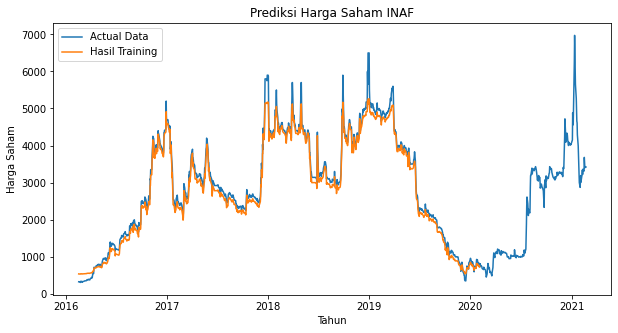

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df["Adj Close"], label = "Actual Data")
plt.plot(df["Hasil Training"], label = "Hasil Training")
plt.xlabel("Tahun")
plt.ylabel("Harga Saham")
plt.title("Prediksi Harga Saham INAF")
plt.legend()
plt.show()

In [11]:
#Melakukan test
input  = vstack(([x_test_1],[x_test_2]))
output = [y_test] 
percobaan.forward(np.array(input).T, np.array(output).T)

y = percobaan.y_hat
print("MSE Uji=",percobaan.MSE)
y = y*(max(df[feature[0]])-min(df[feature[0]]))+min(df[feature[0]])

MSE Uji= [[ 0.0007]]


In [12]:
hasil_test = []
for i in arange(n_df-len(y)):
  hasil_test.append(np.nan)

hasil_test.extend(list(y.T[0]))

df["Hasil Test"] = hasil_test
df

,High,Low,Open,Close,Volume,Adj Close,Hasil Training,Hasil Test
Date,,,,,,,,
2016-02-17,330.0,314.0,316.0,321.0,8334700.0,321.0,[533.166323025513],NaN
2016-02-18,325.0,310.0,325.0,318.0,3805600.0,318.0,[532.6954231465725],NaN
2016-02-19,320.0,312.0,314.0,318.0,878300.0,318.0,[532.9364885556123],NaN
2016-02-22,319.0,308.0,318.0,313.0,1346500.0,313.0,[531.5159171390305],NaN
2016-02-23,317.0,299.0,313.0,303.0,1584800.0,303.0,[528.7741984402927],NaN
...,...,...,...,...,...,...,...,...
2021-02-16,3680.0,3290.0,3320.0,3680.0,15644600.0,3680.0,NaN,3388.900077
2021-02-17,3770.0,3500.0,3710.0,3540.0,10291200.0,3540.0,NaN,3501.929711
2021-02-18,3650.0,3400.0,3540.0,3400.0,2375700.0,3400.0,NaN,3477.551187


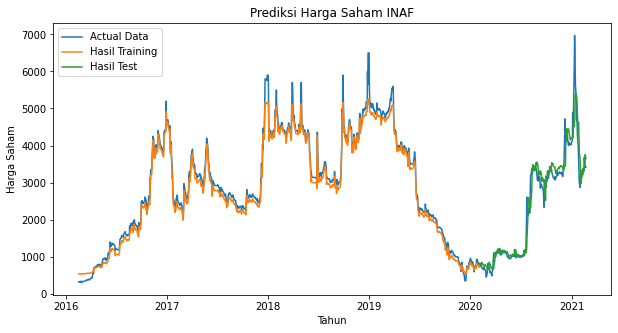

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df["Adj Close"], label = "Actual Data")
plt.plot(df["Hasil Training"], label = "Hasil Training")
plt.plot(df["Hasil Test"], label = "Hasil Test")
plt.xlabel("Tahun")
plt.ylabel("Harga Saham")
plt.title("Prediksi Harga Saham INAF")
plt.legend()
plt.show()